In [1]:

# imports
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import logging
from pathlib import Path
import pandas as pd

# Project imports
from utils.cochlea_loader_functions import load_cochlea_results, organize_for_eachtone_allCFs


Found results directory: wav_20cf_128-128-128anf_psth_3files_20260212_190110
Found 3 .npz files

Loaded: sequence02_fc440hz_dur200ms_isi100ms_total0.5sec_numtones2
PSTH shape: (20, 500)
Duration: 0.50 seconds


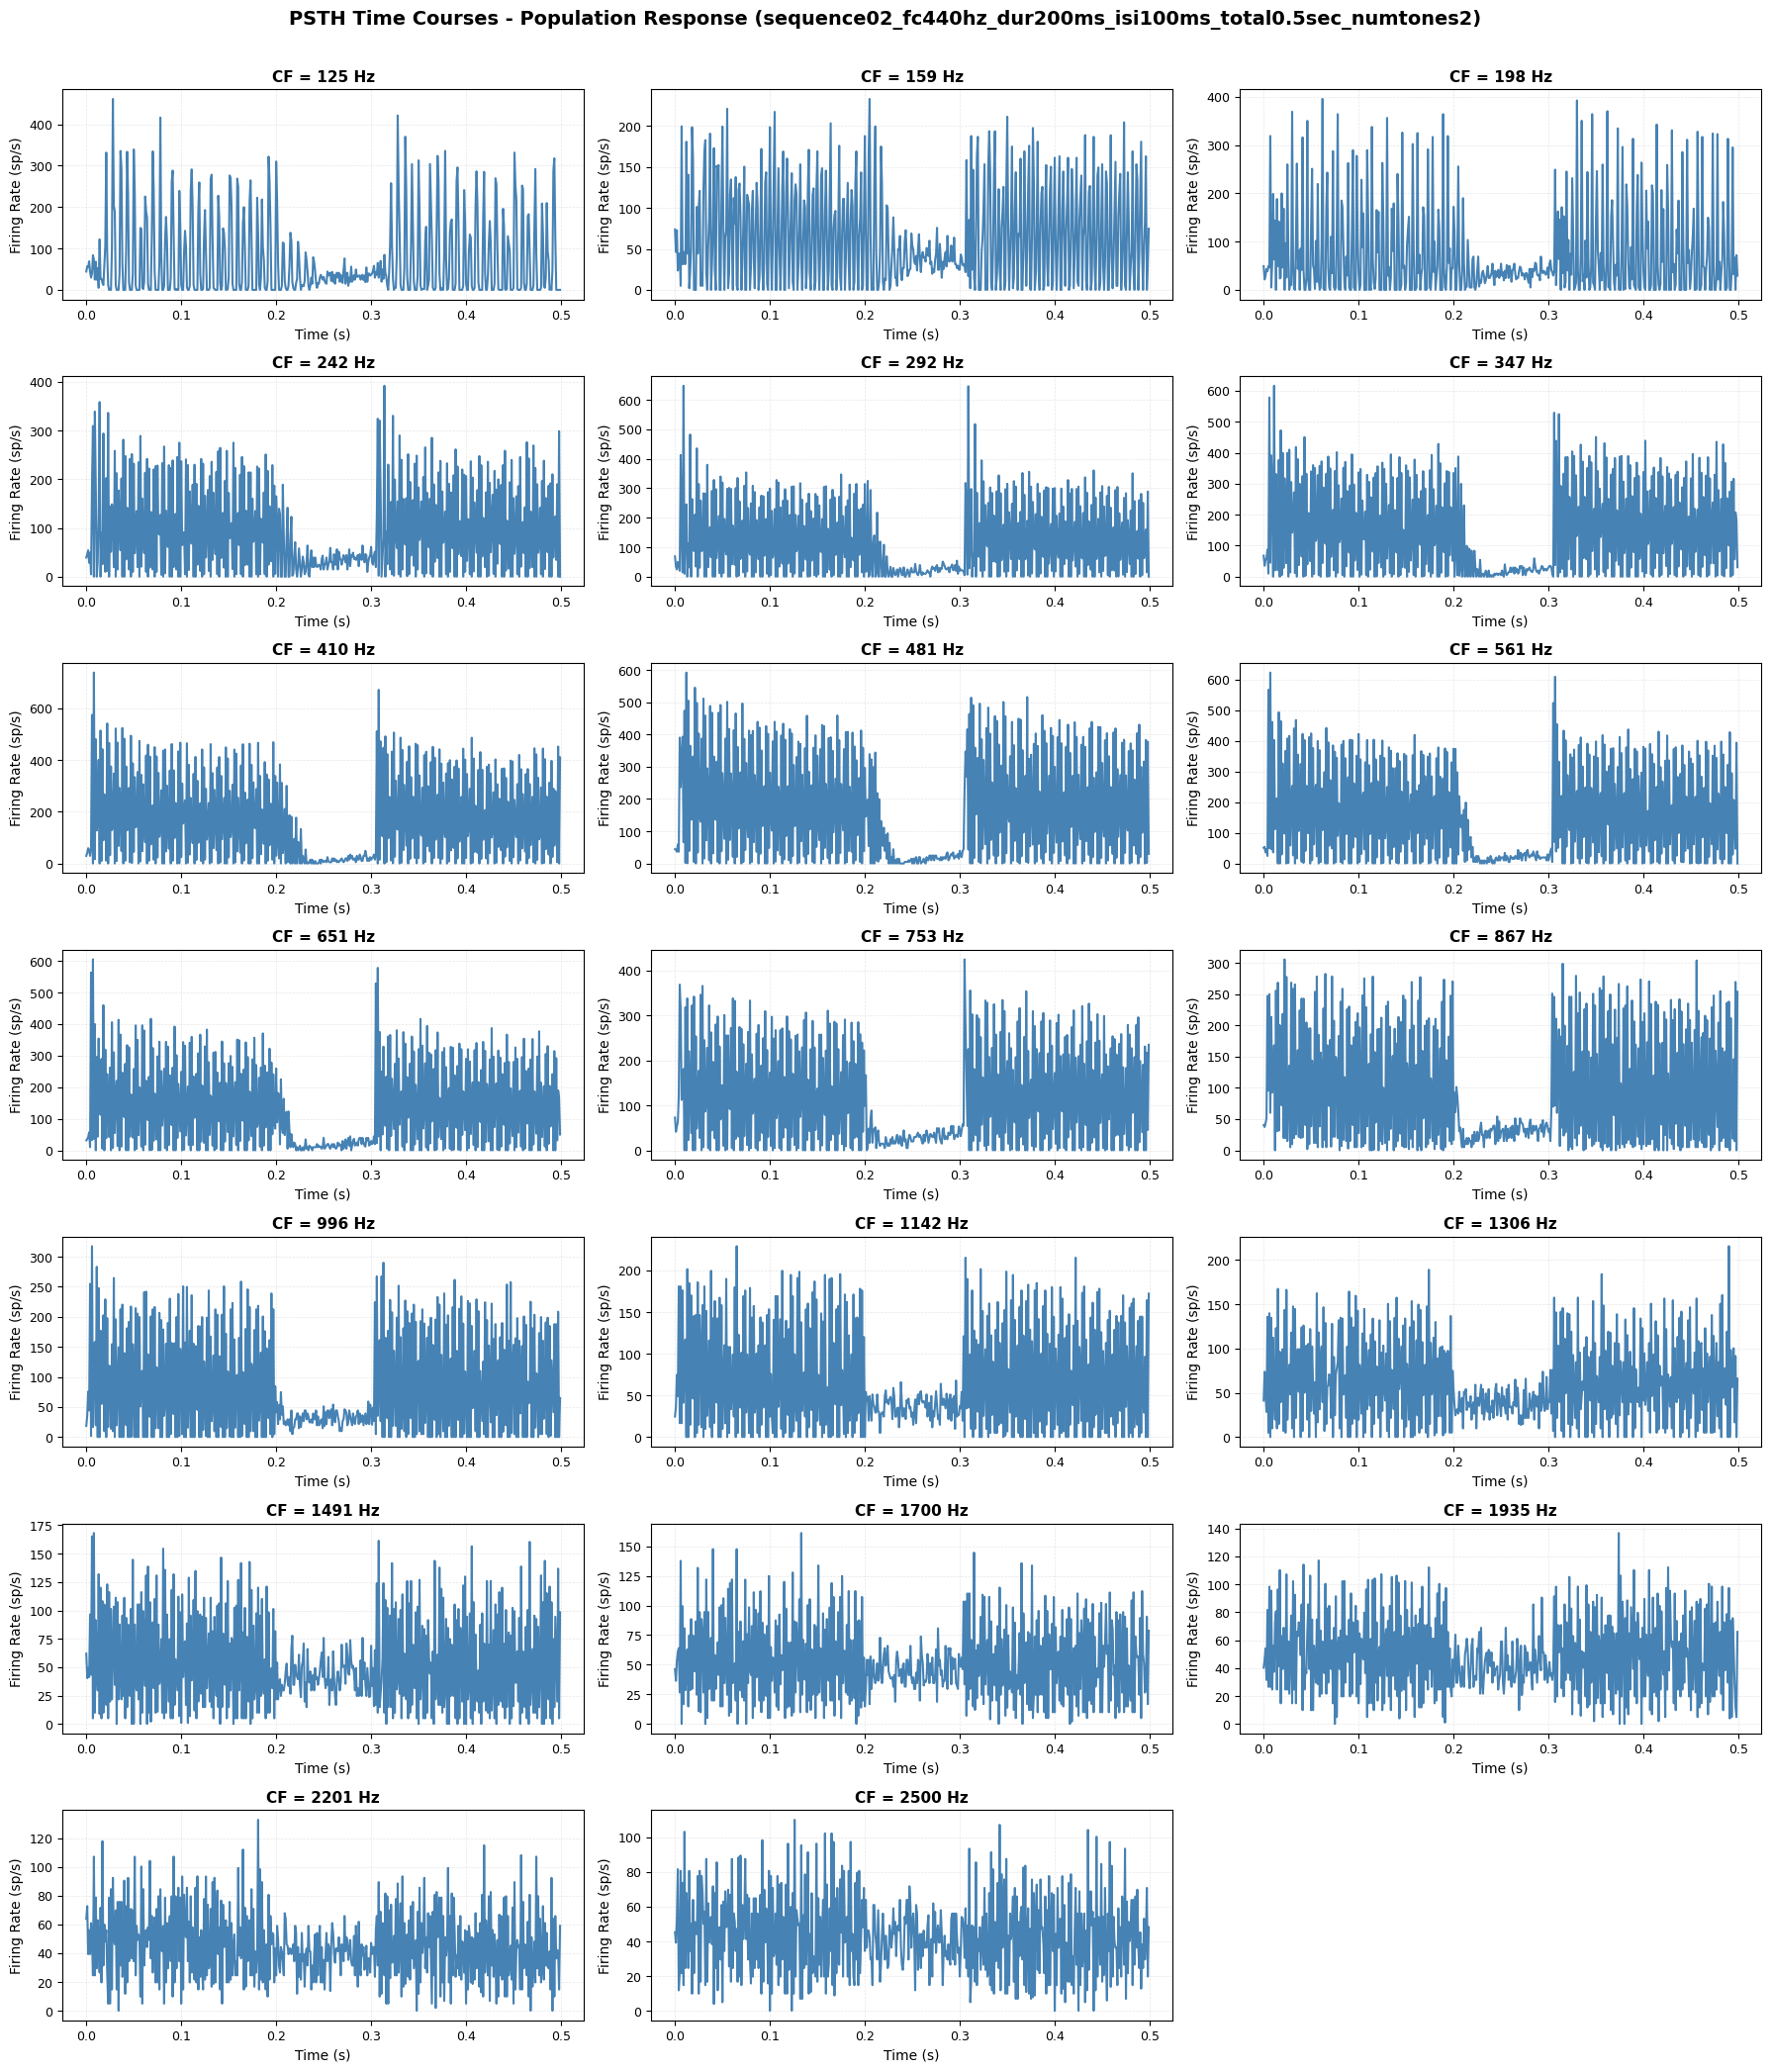

In [8]:
# ===== Load PSTH data from WAV simulation =====
from utils.result_saver import ResultSaver
from visualization.plot_cochlea_output import plot_psth_timecourses

# Specify base directory (update this path to your data)
base_dir = Path("./models_output/cochlea_wavfiles_120226_05")

# Find the nested results folder (most recent subdirectory)
subdirs = [d for d in base_dir.iterdir() if d.is_dir()]
if not subdirs:
    raise FileNotFoundError(f"No subdirectories found in {base_dir}")

psth_results_dir = max(subdirs, key=lambda p: p.stat().st_mtime)
print(f"Found results directory: {psth_results_dir.name}")

# Load first file as example
saver = ResultSaver(psth_results_dir)
npz_files = list(psth_results_dir.glob('*.npz'))

if npz_files:
    print(f"Found {len(npz_files)} .npz files")

    # Load first file
    data = saver.load_npz(npz_files[0].name)

    # Extract data
    population_psth = data['population_rate_psth']
    time_axis = data['time_axis']
    cf_list_psth = data['cf_list']
    identifier = data.get('soundfileid', 'unknown')

    print(f"\nLoaded: {identifier}")
    print(f"PSTH shape: {population_psth.shape}")
    print(f"Duration: {time_axis[-1]:.2f} seconds")

    # Plot time courses
    fig, axes = plot_psth_timecourses(
        time_axis=time_axis,
        population_psth=population_psth,
        cf_list=cf_list_psth,
        identifier=identifier
    )

    plt.show()
else:
    print(f"No .npz files found in {psth_results_dir}")


Plotting all 2 stimuli


[1/2] Loading: customsequences_test04_sequence01_fc440hz_dur200ms_isi100ms_total0.3sec_numtones1.npz
    - PSTH shape: (20, 300)
    - Duration: 0.30 seconds


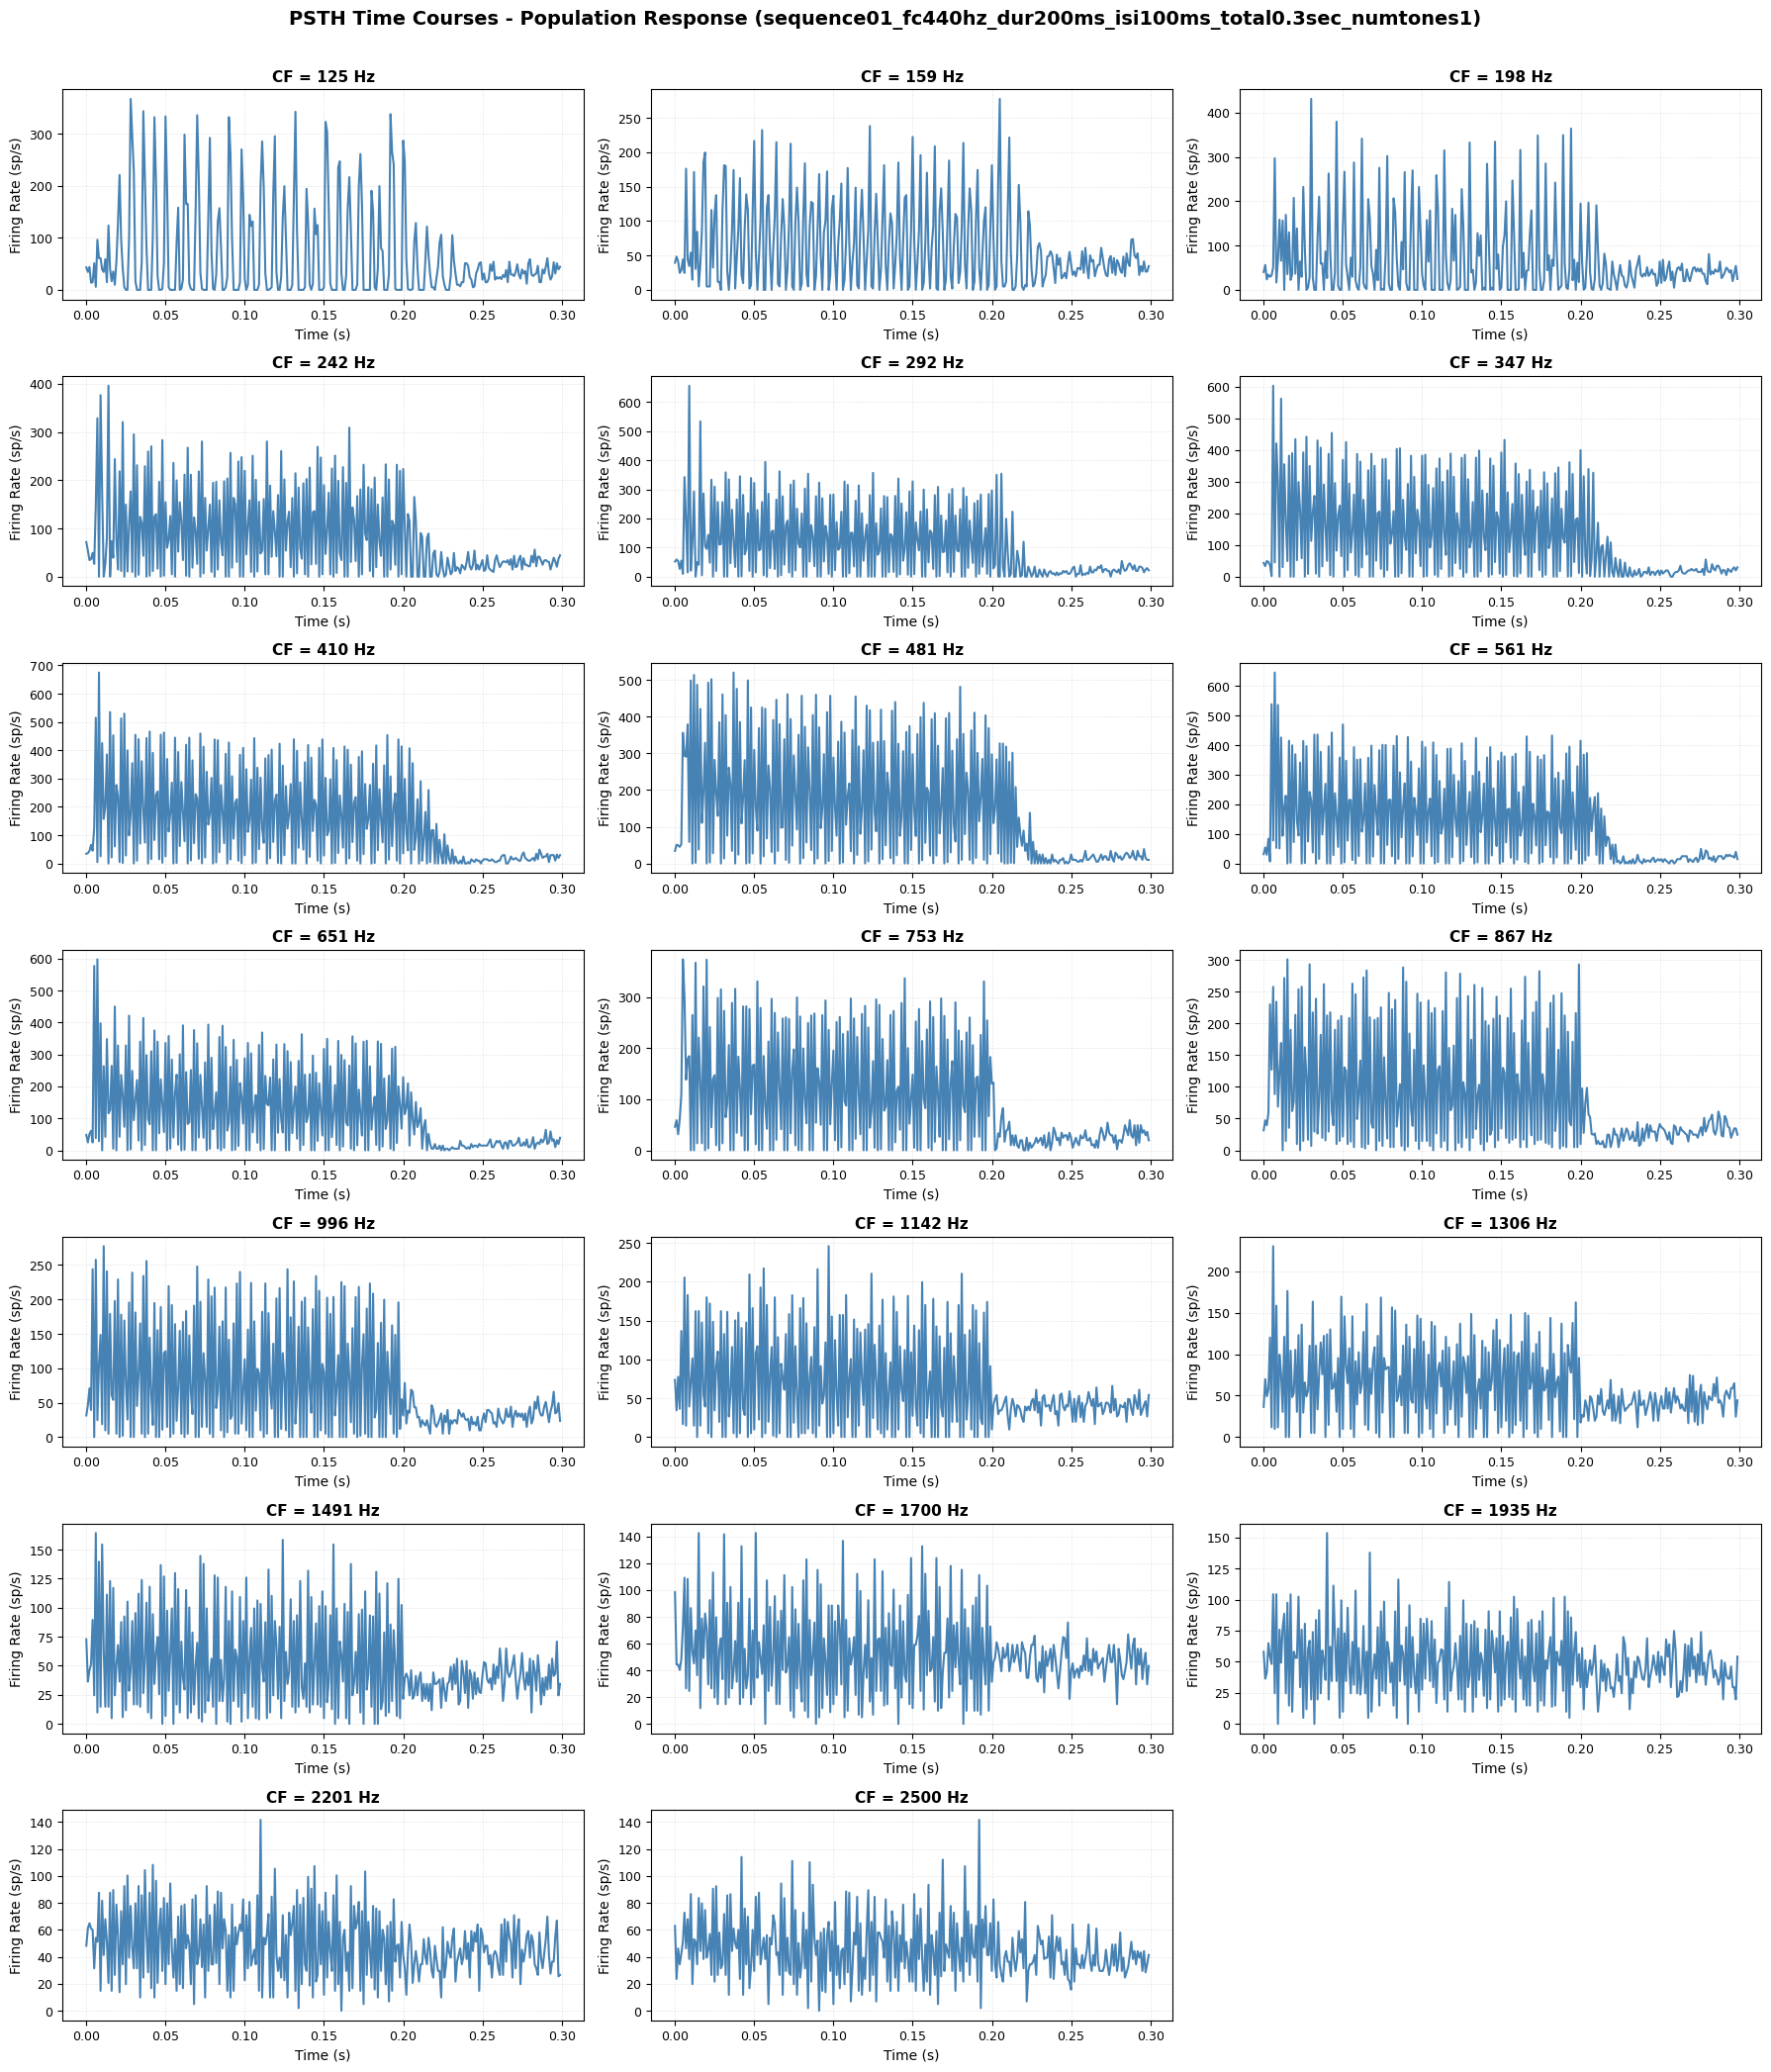


[2/2] Loading: customsequences_test04_sequence02_fc440hz_dur200ms_isi100ms_total0.5sec_numtones2.npz
    - PSTH shape: (20, 500)
    - Duration: 0.50 seconds


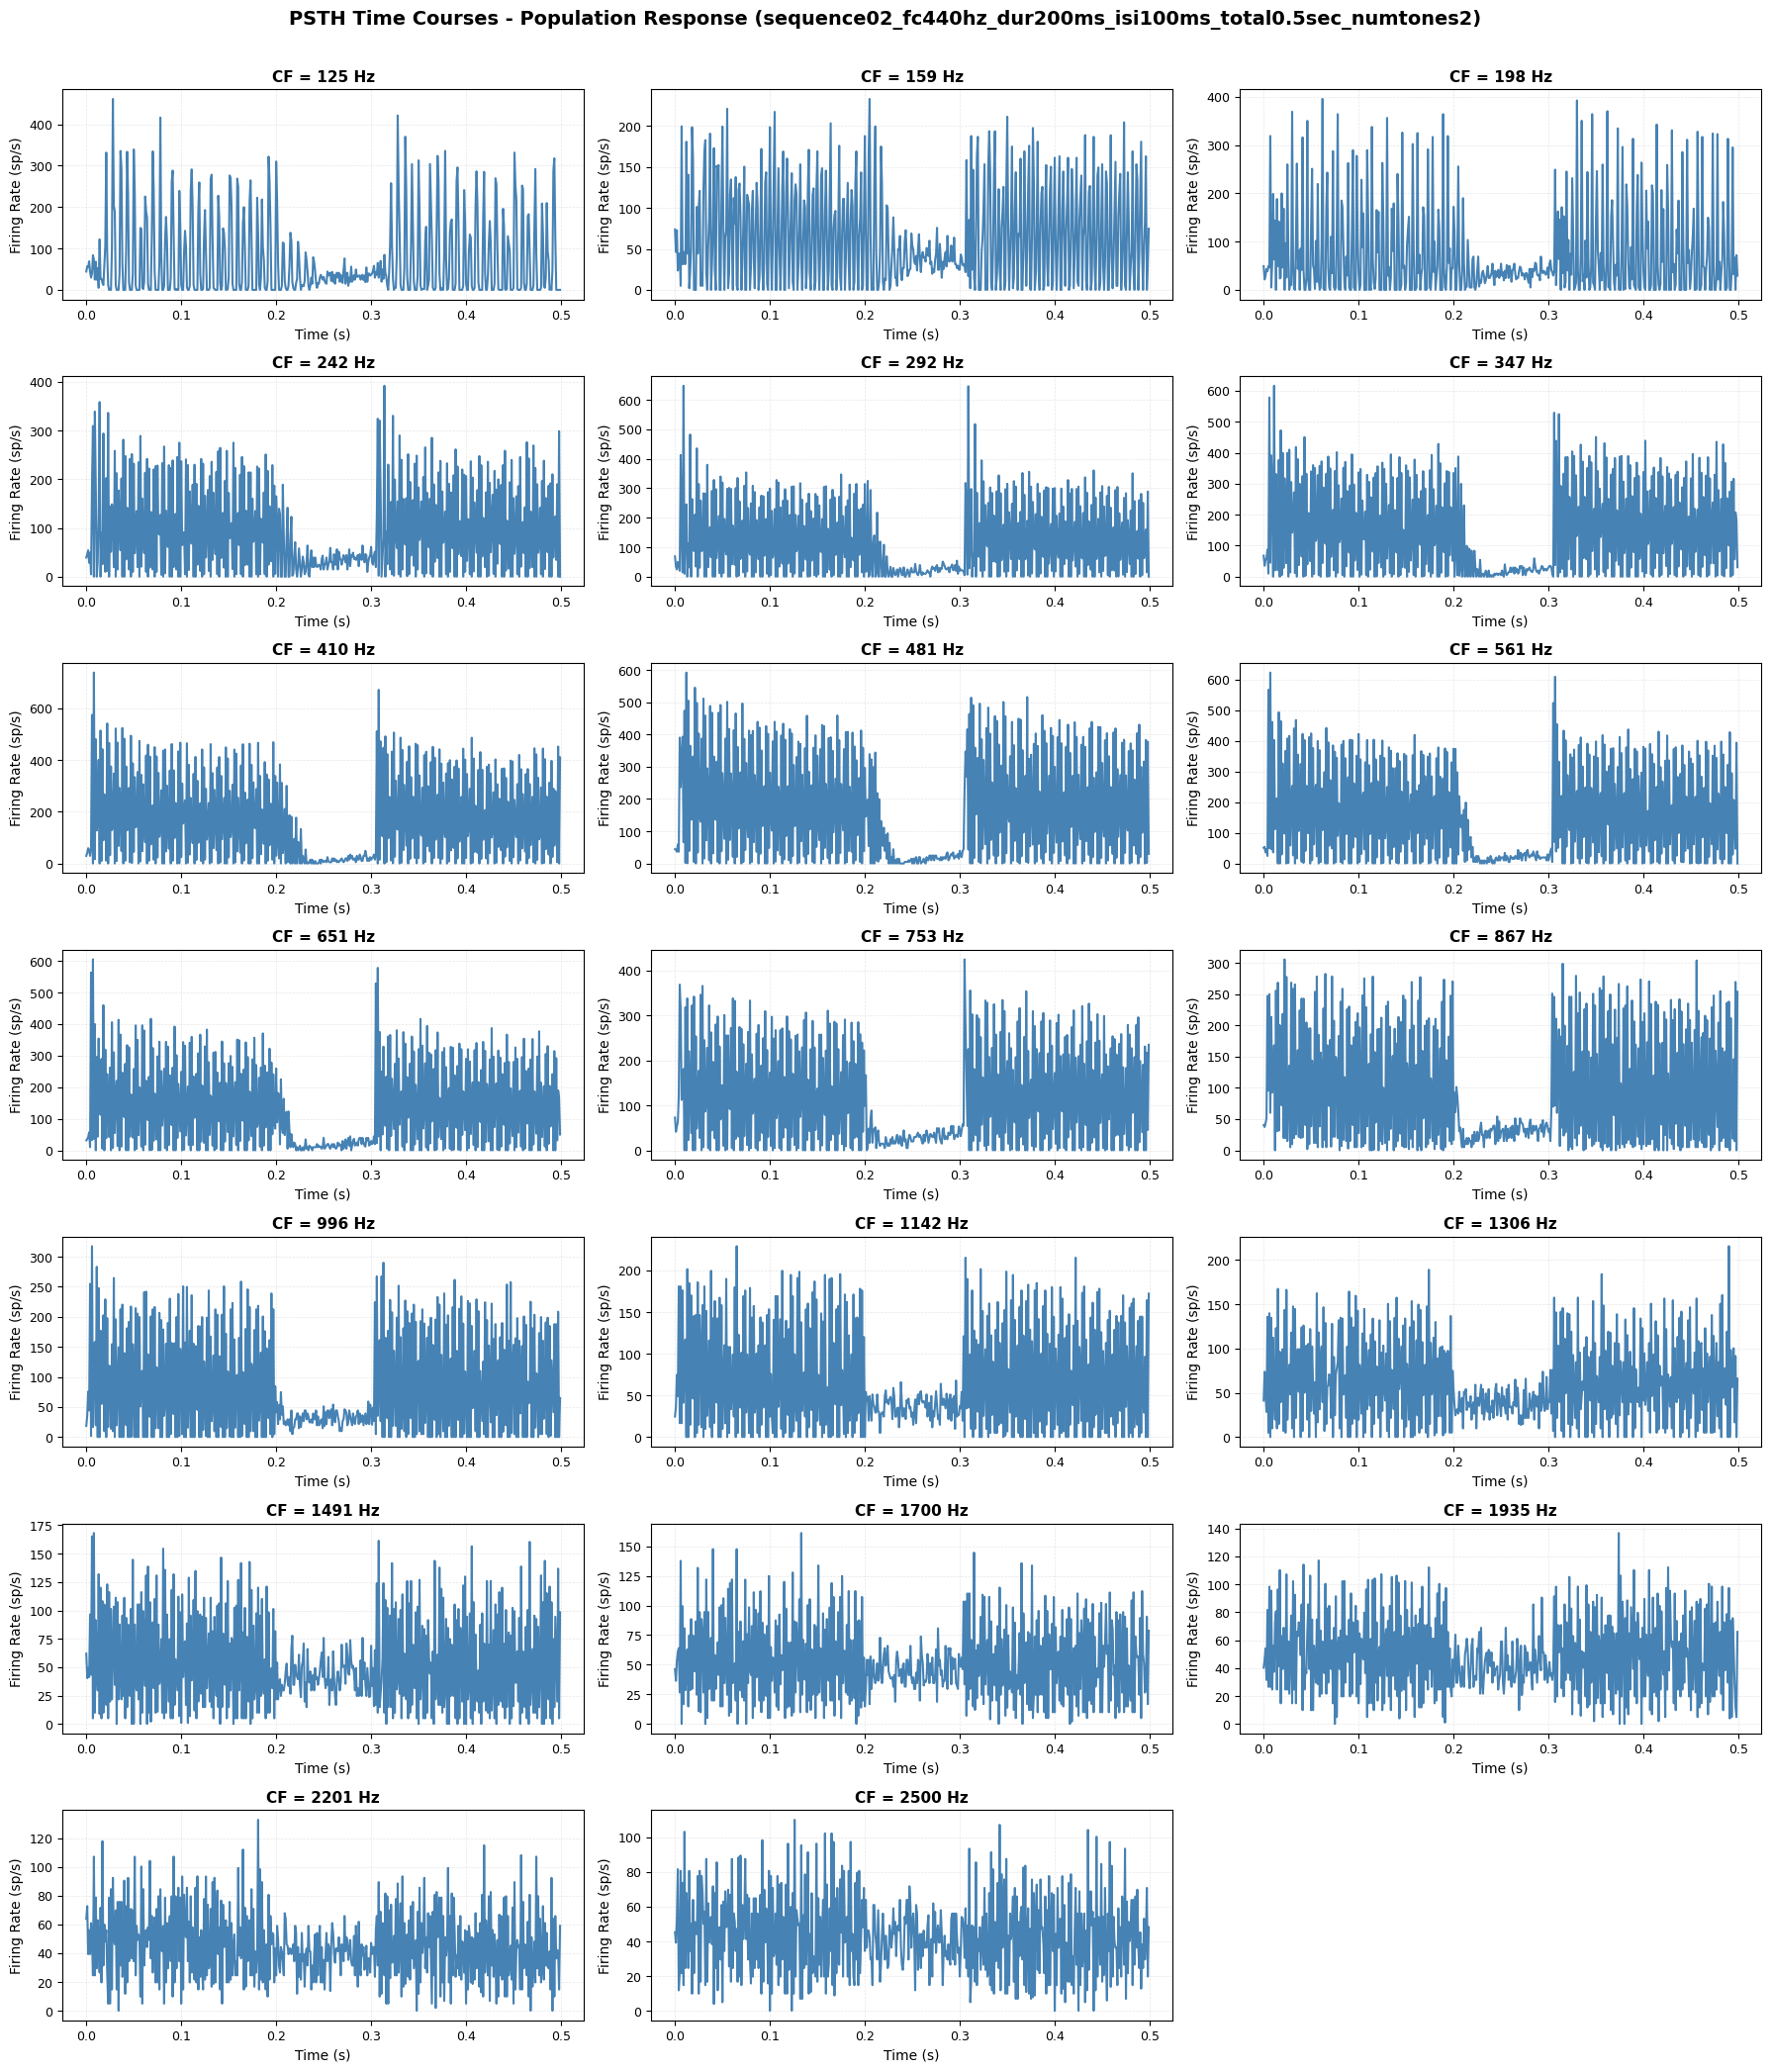


Completed plotting all stimuli


In [7]:
# ===== Plot ALL stimuli in the folder =====

print(f"\n{'='*60}")
print(f"Plotting all {len(npz_files)} stimuli")
print(f"{'='*60}\n")

for i, npz_file in enumerate(npz_files, 1):
    print(f"\n[{i}/{len(npz_files)}] Loading: {npz_file.name}")

    # Load data
    data = saver.load_npz(npz_file.name)

    # Extract data
    population_psth = data['population_rate_psth']
    time_axis = data['time_axis']
    cf_list_psth = data['cf_list']
    identifier = data.get('soundfileid', 'unknown')

    print(f"    - PSTH shape: {population_psth.shape}")
    print(f"    - Duration: {time_axis[-1]:.2f} seconds")

    # Plot time courses
    fig, axes = plot_psth_timecourses(
        time_axis=time_axis,
        population_psth=population_psth,
        cf_list=cf_list_psth,
        identifier=identifier
    )

    plt.show()

print(f"\n{'='*60}")
print(f"Completed plotting all stimuli")
print(f"{'='*60}")